In [194]:
pca=feature.PCA(k=30, inputCol='final_features', outputCol='scores')

In [195]:
pca_pipe = Pipeline(stages = [allParts_pipe,pca])

In [196]:
pipe_pca_fit=pca_pipe.fit(train)

In [197]:
pipe_pca_fitted=pipe_pca_fit.transform(train)

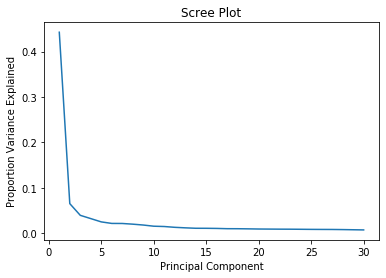

In [199]:
import numpy as np
plt.figure()
explained_var = pipe_pca_fit.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained");

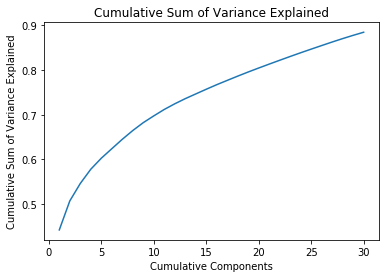

In [200]:
# import numpy as np
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained");

In [203]:
for k in range(len(cum_sum)-1): 
    best_k=k
    if (cum_sum[k+1]>0.8):
        break
print("the best_k for 80% variance is:",best_k)

the best_k for 80% variance is: 18


In [204]:
for k in range(len(cum_sum)-1): 
    best_k=k
    if (cum_sum[k+1]>0.9):
        break
print("the best_k for 90% variance is:",best_k)

the best_k for 90% variance is: 28


In [ ]:
X = np.array(pipe_pca_fitted.select('scores').rdd.map(lambda x: x['scores']).collect())

In [ ]:
import matplotlib.pyplot as plt
# Your code here
# now plot the data
fig, ax = plt.subplots();
fig.set_figheight(7)
fig.set_figwidth(7)
ax.scatter(X[:,0], X[:,1])
fig.suptitle("Data Science Programs Data PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [ ]:
loadings = pipe_pca_fit.stages[-1].pc.toArray()
pc1 = pipe_pca_fit.stages[-1].pc.toArray()[:, 0].tolist() #loading vector
pc2 = pipe_pca_fit.stages[-1].pc.toArray()[:, 1].tolist()

I have not figured out how to get the features correspond to pc values<br>
You can use the score as input column for RF for classification.<br>
So that you can campare 'RF with all features' (after removing correlated cols) vs 'RF with best-k PCs'